<center><h1>Kan_Herun_HW2</h1></center>
<br>
<br>

Name: Herun Kan
<br>
Github Username: herunkan
<br>
USC ID: 7222919427

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import sklearn.preprocessing as pp

Get the Cycle Power Plant Data Set

In [2]:
data = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')

In [3]:
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [4]:
print(data.shape,
      data.columns
      )


(9568, 5) Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


The data contains 9568 rows and 5 columns that are 'AT' (Ambient Temperature), 'V' (Exhaust Vacuum), 'AP' (Ambient Pressure), 'RH' (Relative Humidity), 'PE'(Energt Output). Each rows contains the data of those 5 attributes in a specific hour.

#### ii. pairwise scatterplots of all the varianbles

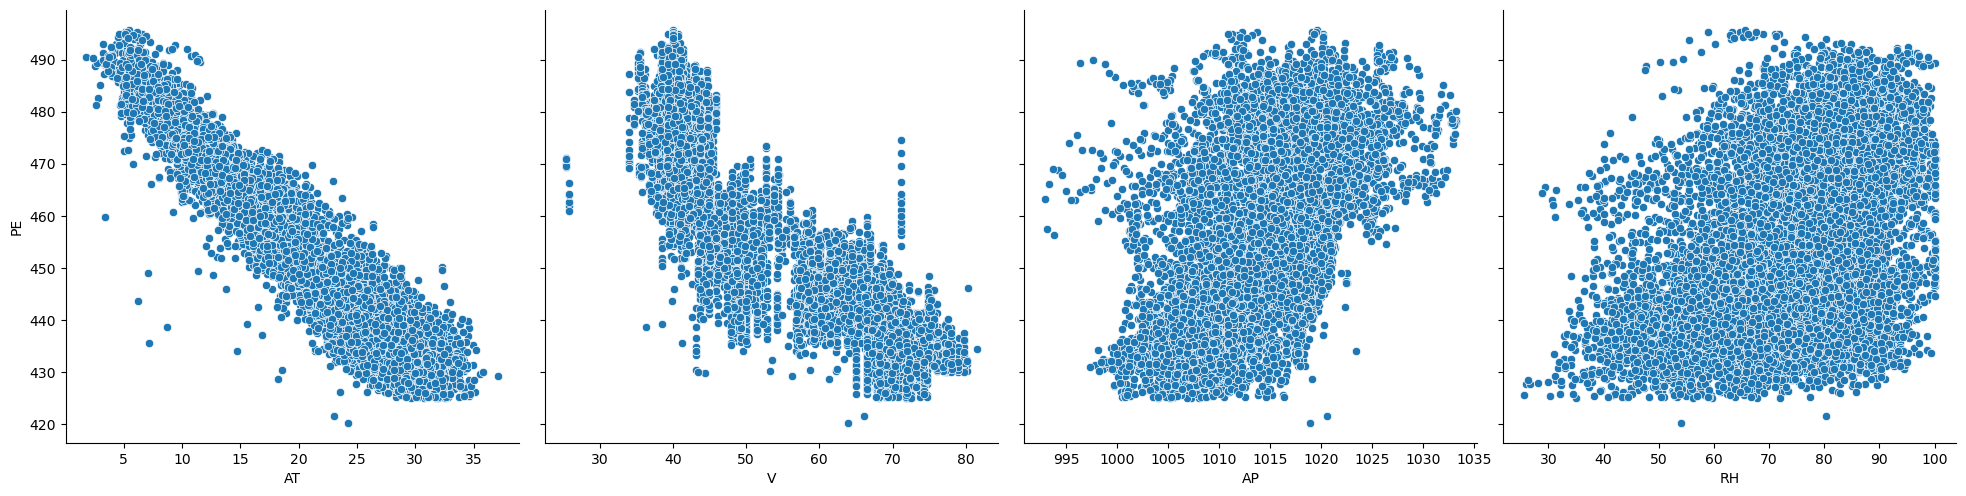

In [5]:
sns.pairplot(data, x_vars= ['AT', 'V', 'AP', 'RH'], y_vars= 'PE', height= 5)
plt.show()

It seems that AT has a negative linear relationship with PE, same goes with V.
While AP and RH have a somewhat positive linear relationship with PE but is more discrete

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [6]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### (c) Simple Linear Regression

Summary of AT vs PE
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:04:21   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156

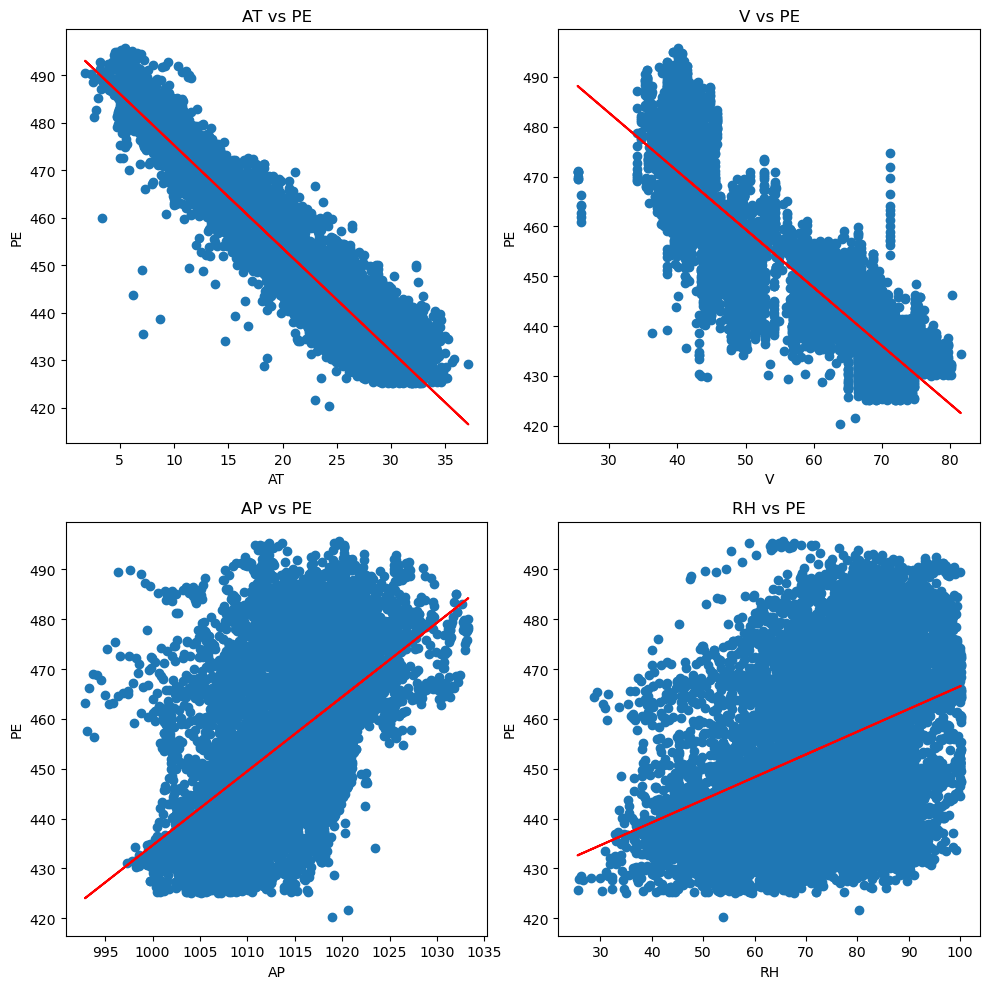

In [7]:
variables = ['AT', 'V', 'AP', 'RH']

univariatecoefs = []

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, variable in enumerate(variables):
    x = sm.add_constant(data[variable])
    y = data['PE']
    model = sm.OLS(y, x)
    result = model.fit()

    univariatecoefs.append(result.params[variable])
    
    print(f'Summary of {variable} vs PE')
    print(result.summary())
    
    ax = axes[i//2, i%2]
    ax.scatter(data[variable], data['PE'])
    ax.plot(data[variable], result.predict(x), color='red')
    ax.set_title(f'{variable} vs PE')
    ax.set_xlabel(variable)
    ax.set_ylabel('PE')

plt.tight_layout()
plt.show()

#Help from GPT

#Prompt

# for variable in variables:
#     model = sm.add_constant(data[variable])
#     model = sm.OLS(data['PE'], data[variable])
#     result = model.fit()
#     print(f'Summary of PE vs {variable}')
#     print(result.summary())

# why does it not return coefs and centered r squared?: Summary of PE vs AT
#                                  OLS Regression Results                                
# =======================================================================================
# Dep. Variable:                     PE   R-squared (uncentered):                   0.850
# Model:                            OLS   Adj. R-squared (uncentered):              0.850
# Method:                 Least Squares   F-statistic:                          5.405e+04
# Date:                Thu, 26 Sep 2024   Prob (F-statistic):                        0.00
# Time:                        15:20:09   Log-Likelihood:                         -63065.
# No. Observations:                9568   AIC:                                  1.261e+05
# Df Residuals:                    9567   BIC:                                  1.261e+05
# Df Model:                           1                                                  
# Covariance Type:            nonrobust                                                  
# ==============================================================================
#                  coef    std err          t      P>|t|      [0.025      0.975]
# ------------------------------------------------------------------------------
# AT            19.9415      0.086    232.492      0.000      19.773      20.110
# ==============================================================================
# Omnibus:                     3063.612   Durbin-Watson:                   1.758
# Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.616
# Skew:                           0.163   Prob(JB):                    7.91e-107
# Kurtosis:                       1.942   Cond. No.                         1.00
# ==============================================================================

#Response

#The issue with your code is that you’re not correctly adding a constant term (the intercept) to the model when using sm.add_constant(). Also, you’re not passing the constant-added variable to the OLS model.


From the summary and the graphs we can see that AT vs PE has a R squared close to 1, indicating that there is strong relationship between the two variables, while AP and RH have smaller than 0.5. There are definetly outliers in all four models.

### (d) Multiple Regression

In [8]:
x = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]


X = sm.add_constant(x)

model = sm.OLS(y, X)
result = model.fit()
multiplecoef = result.params[['AT', 'V', 'AP', 'RH']]

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:04:21   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

From the summary we can see that the p values for all four predictors are approximately 0s which means that all four predictors are statistically significant 

### (e) 1c Compare to 1d

/var/folders/5_/zn1tlqnd50z90_mf2r06kkf40000gn/T/ipykernel_30256/3561937570.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(variable, (univariatecoefs[i], multiplecoef[i]))


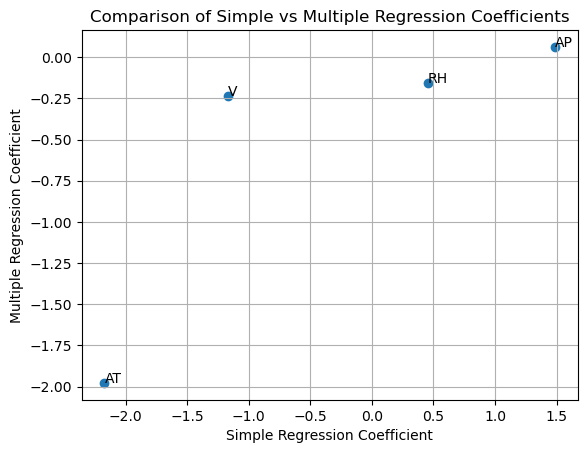

In [9]:
plt.scatter(univariatecoefs, multiplecoef)


for i, variable in enumerate(variables):
    plt.annotate(variable, (univariatecoefs[i], multiplecoef[i]))

plt.xlabel('Simple Regression Coefficient')
plt.ylabel('Multiple Regression Coefficient')
plt.title('Comparison of Simple vs Multiple Regression Coefficients')
plt.grid(True)
plt.show()


AT has a similar coef between univariate and multiple, while the other three have a larger coef in multiple regression models.

### (f) Nonlinear Association

In [10]:
for variable in variables:
    X = data[[variable]]

    poly = pp.PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)
    
    model = lm.LinearRegression()
    model.fit(X_poly, y)
    
    m_coef = model.coef_

    print(f'Polynomial regression results for {variable}:')
    print(f'Coefficients: {list(np.float64(m_coef))}')


Polynomial regression results for AT:
Coefficients: [array([ 0.        , -0.61034571, -0.12513818,  0.00267485])]
Polynomial regression results for V:
Coefficients: [array([ 0.00000000e+00, -2.14437732e+00, -2.71228490e-03,  1.34357110e-04])]
Polynomial regression results for AP:
Coefficients: [array([ 0.00000000e+00, -1.54608662e+04,  1.52162526e+01, -4.99115996e-03])]
Polynomial regression results for RH:
Coefficients: [array([ 0.00000000e+00, -1.72921131e+00,  3.21451721e-02, -1.52187969e-04])]


Most variables have a linear  relationship with PE while AT and AP, especially AP, have a non-linear relationship

### (g) Interactions of Predictors

In [11]:
x = data[['AT', 'V', 'AP', 'RH']]
poly = pp.PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly.fit_transform(x)

X_poly = sm.add_constant(X_poly)
model = sm.OLS(y, X_poly).fit()

print(model.summary())

#Help from GPT

#Prompt
# did my code excecute this problem right?

# x = data[['AT', 'V', 'AP', 'RH']]
# poly = pp.PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
# X_poly = poly.fit_transform(x)

# X_poly = sm.add_constant(X_poly)
# model = sm.OLS(y, X_poly).fit()

# print(model.summary())

# To answer this question, run a full linear regression model with all pairwise interaction
# terms and state whether any interaction terms are statistically significant

#Response
# Yes, your code did correctly fit a full linear regression model with all pairwise interaction terms and produced valid output. Here’s why:

# 	1.	PolynomialFeatures (with interaction_only=True):
# 	•	You used PolynomialFeatures(degree=2, interaction_only=True), which generates interaction terms between all the predictors. This is the correct way to generate pairwise interaction terms.
# 	•	By setting degree=2 and interaction_only=True, the model creates interaction terms between every pair of features without including higher powers of individual features.



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:04:21   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

The summary shows that x5: AT and V, x7: AT and RH , and x8: V and AP have p values smaller than 0.05 which proves that these interaction terms are significant.

### (h) Improvement

In [12]:
import sklearn.model_selection as ms
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.3, random_state=0)

noninteract_x_train = sm.add_constant(x_train)
noninteract_x_test = sm.add_constant(x_test)

noninteract_model = sm.OLS(y_train, noninteract_x_train).fit()

noninteract_y_predict_train = noninteract_model.predict(noninteract_x_train)
noninteract_y_predict_test = noninteract_model.predict(noninteract_x_test)

noninteract_train_mse = mean_squared_error(y_train, noninteract_y_predict_train)
noninteract_test_mse = mean_squared_error(y_test, noninteract_y_predict_test)

print('noninteractive Model:')
print(f'Train MSE: {noninteract_train_mse}')
print(f'Test MSE: {noninteract_test_mse}')


noninteractive Model:
Train MSE: 20.94156361673958
Test MSE: 20.368383002885906


In [13]:
poly = pp.PolynomialFeatures(degree=2, include_bias=False)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.transform(x_test)

poly_x_train = sm.add_constant(poly_x_train)
poly_x_test = sm.add_constant(poly_x_test)

poly_model = sm.OLS(y_train, poly_x_train).fit()


print(f'Summary of model with interaction features: {poly_model.summary()}')

poly_y_predict_train = poly_model.predict(poly_x_train)
poly_y_predict_test = poly_model.predict(poly_x_test)

mse_train_poly = mean_squared_error(y_train, poly_y_predict_train)
mse_test_poly = mean_squared_error(y_test, poly_y_predict_test)

print('Interactive model:')
print(f'Train MSE: {mse_train_poly}')
print(f'Test MSE: {mse_test_poly}')

p_values = poly_model.pvalues
significant_mask = p_values < 0.05 

significant_poly_x_train = poly_x_train[:, significant_mask]
significant_poly_x_test = poly_x_test[:, significant_mask]

enhanced_model_significant = sm.OLS(y_train, significant_poly_x_train).fit()

print('\n')
print(f'Summary of model with interaction features without insignificant variables: {enhanced_model_significant.summary()}')

enhanced_y_predict_train = enhanced_model_significant.predict(significant_poly_x_train)
enhanced_y_predict_test = enhanced_model_significant.predict(significant_poly_x_test)

mse_train_enhanced = mean_squared_error(y_train, enhanced_y_predict_train)
mse_test_enhanced = mean_squared_error(y_test, enhanced_y_predict_test)

print('Enhanced model:')
print(f'Train MSE: {mse_train_enhanced}')
print(f'Test MSE: {mse_test_enhanced}')


Summary of model with interaction features:                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:04:21   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

The Interaction model without removing variables has the lowest MSEs.

### (i) KNN

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

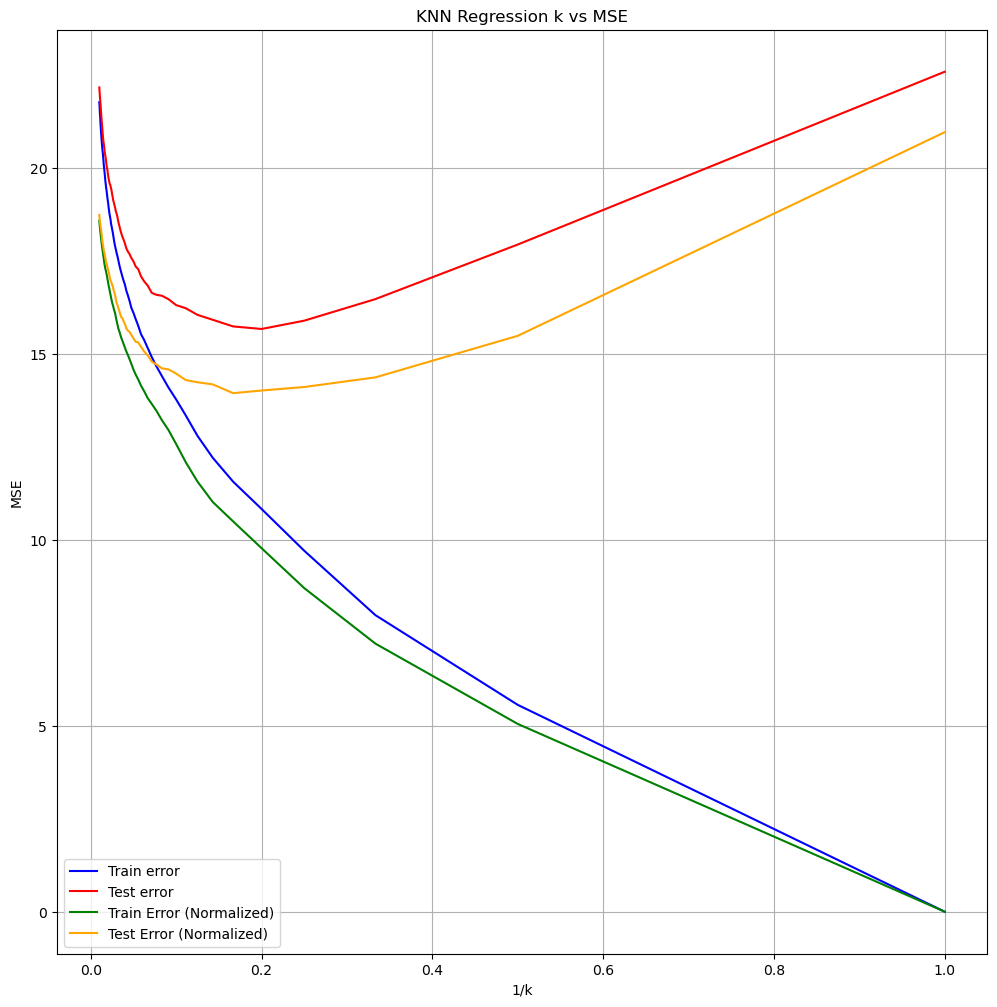

In [15]:
k_num = list(range(1, 101, 1))

train_errors = {}
test_errors = {}

scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)
train_errors_norm = {}
test_errors_norm = {}

for k in k_num:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    predict_trainy = knn.predict(x_train)
    train_error = mean_squared_error(y_train, predict_trainy)
    train_errors[k] = train_error
    
    predict_testy = knn.predict(x_test)
    test_error = mean_squared_error(y_test, predict_testy)
    test_errors[k] = test_error

    #Normalized
    knn_norm = KNeighborsRegressor(n_neighbors=k)
    knn_norm.fit(x_train_norm, y_train)
    
    predict_trainy_norm = knn_norm.predict(x_train_norm)
    train_error_norm = mean_squared_error(y_train, predict_trainy_norm)
    train_errors_norm[k] = train_error_norm
    
    predict_testy_norm = knn_norm.predict(x_test_norm)
    test_error_norm = mean_squared_error(y_test, predict_testy_norm)
    test_errors_norm[k] = test_error_norm


plt.figure(figsize=(12, 12))

plt.plot(1 / np.array(k_num), train_errors.values(), label='Train error', color='blue')
plt.plot(1 / np.array(k_num), test_errors.values(), label='Test error', color='red')

plt.plot(1 / np.array(k_num), train_errors_norm.values(), label='Train Error (Normalized)', color='green')
plt.plot(1 / np.array(k_num), test_errors_norm.values(), label='Test Error (Normalized)' , color='orange')

plt.title('KNN Regression k vs MSE')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
print(f'Best k for normalized train error: {min(train_errors_norm, key = train_errors_norm.get)}')
print(f'Best k for normalized test error: {min(test_errors_norm, key = test_errors_norm.get)}')
print(f'best test error: {min(test_errors_norm.values())}')

print('\n')

print(f'Best k for raw train error: {min(train_errors, key = train_errors.get)}')
print(f'Best k for raw test error: {min(test_errors, key = test_errors.get)}')
print(f'best test error: {min(test_errors.values())}')


Best k for normalized train error: 1
Best k for normalized test error: 6
best test error: 13.938621450133523


Best k for raw train error: 1
Best k for raw test error: 5
best test error: 15.6635051689307


### (j ) Compare KNN and Linear

The best test error I got for knn is using normalized features, the test error is 13.94

The best test error I got for linear models is using interaction terms without removing any variables, the test error is 17.52

I think the reason that Knn did a better job is because the relations between the predictors and the PE is so complex that linear models can't fit it that well.

## 2. ISLR: 2.4.1

<h4>For each of parts (a) through (d), indicate whether we would generally
expect the performance of a flexible statistical learning method to be
better or worse than an inflexible method. Justify your answer.<h4>

### (a) The sample size n is extremely large, and the number of predictors p is small.

When sampel size is extremely large, a flexible method can fit the data better than infelxible.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

When p is extremely large and n is small, it is better to use inflexible methods as flexible methods can be disturbed by the relations between predictors with a small n

### (c) The relationship between the predictors and response is highly non-linear.

It is better to use flexible methods as they have more degrees of freedom (If we need large df / if the sample size is large)

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

 It is better to use a inflexible method as a flexible method is more likely to closely fit the noise in the data

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

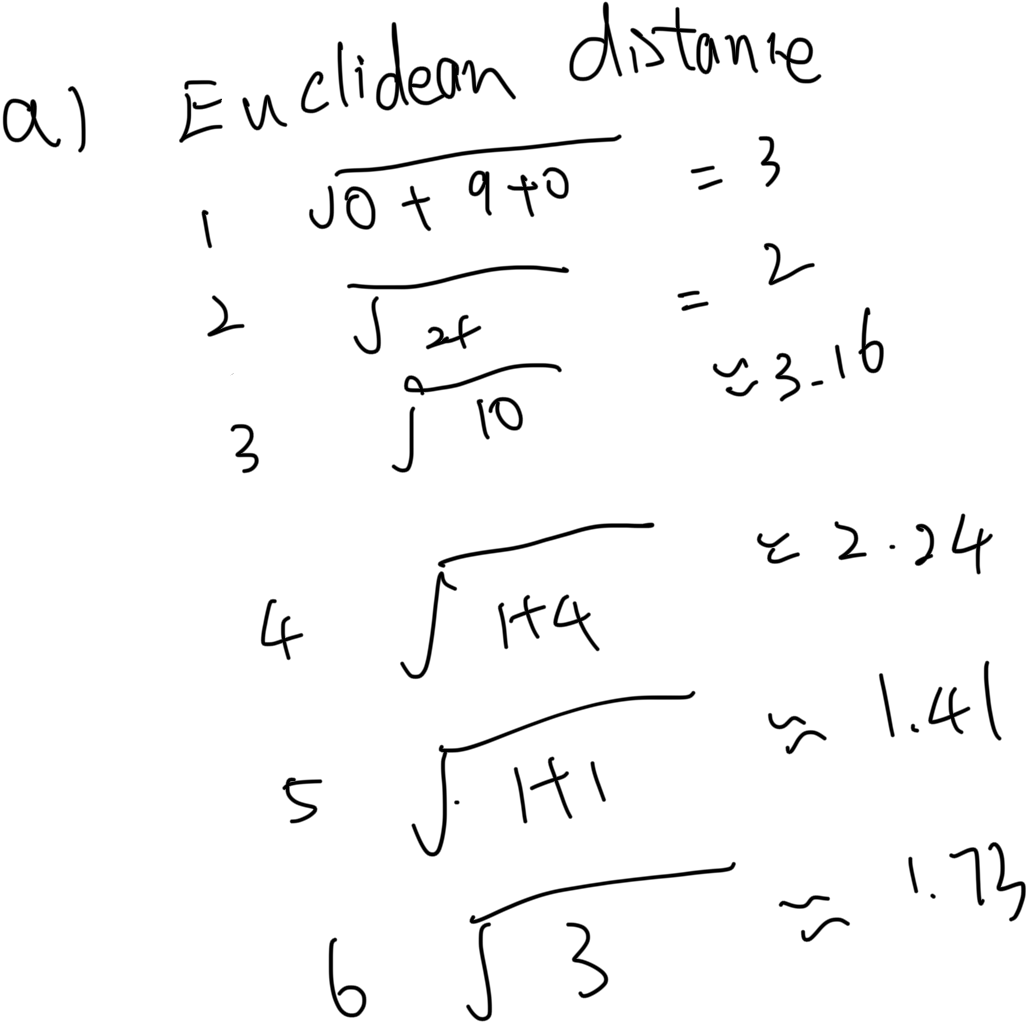

### (b) What is our prediction with K = 1? Why?

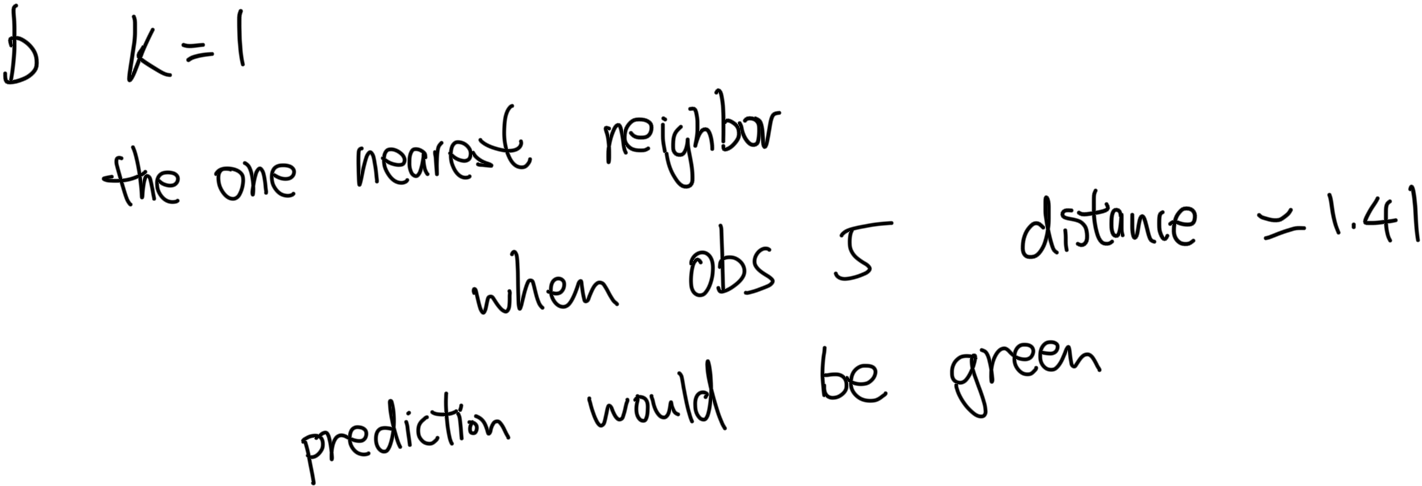

### (c) What is our prediction with K = 3? Why?

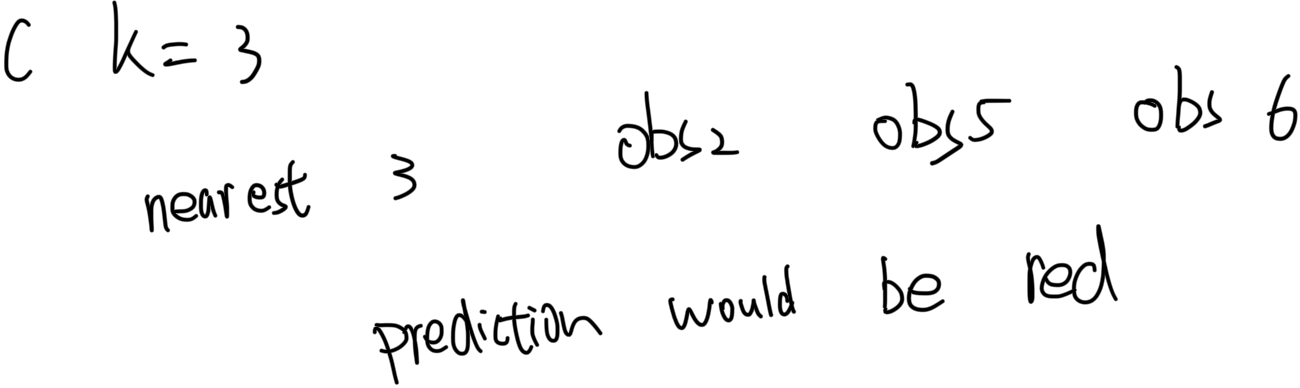

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

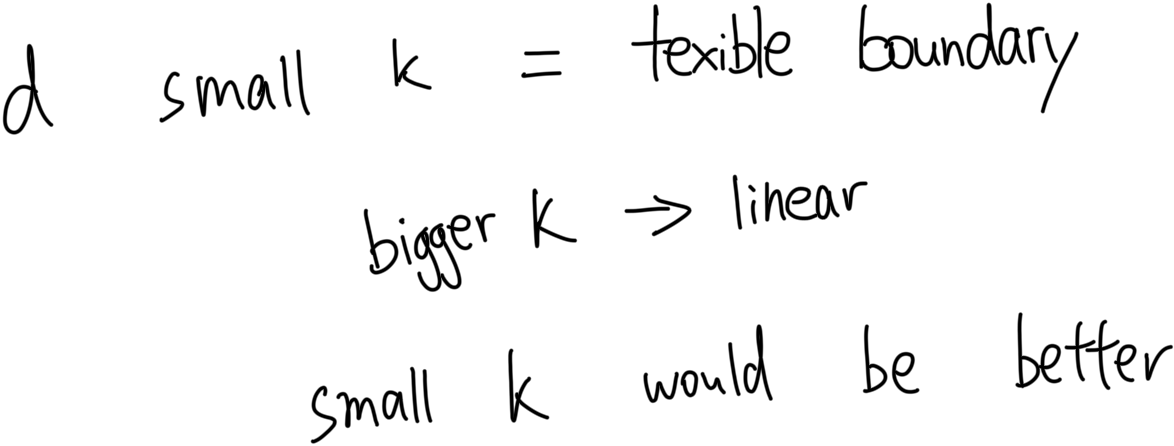